# Import necessary libraries


In [21]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


# Load the dataset


In [6]:
data, meta = arff.loadarff(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\archive (10)\Obesity_Dataset.arff')
df = pd.DataFrame(data)
print(df.head())


   Sex   Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0  2.0  18.0   155.0                      2.0                       2.0   
1  2.0  18.0   158.0                      2.0                       2.0   
2  2.0  18.0   159.0                      2.0                       2.0   
3  2.0  18.0   162.0                      2.0                       2.0   
4  2.0  18.0   165.0                      2.0                       1.0   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                3.0                         1.0   
1                                3.0                         1.0   
2                                2.0                         1.0   
3                                2.0                         2.0   
4                                2.0                         1.0   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  \
0                        3.0      2.0                  1.0   
1               

In [7]:
print(df.dtypes)
print(df.head())


Sex                                  float64
Age                                  float64
Height                               float64
Overweight_Obese_Family              float64
Consumption_of_Fast_Food             float64
Frequency_of_Consuming_Vegetables    float64
Number_of_Main_Meals_Daily           float64
Food_Intake_Between_Meals            float64
Smoking                              float64
Liquid_Intake_Daily                  float64
Calculation_of_Calorie_Intake        float64
Physical_Excercise                   float64
Schedule_Dedicated_to_Technology     float64
Type_of_Transportation_Used          float64
Class                                 object
dtype: object
   Sex   Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0  2.0  18.0   155.0                      2.0                       2.0   
1  2.0  18.0   158.0                      2.0                       2.0   
2  2.0  18.0   159.0                      2.0                       2.0   
3  2.0  18.

In [8]:
# Convert the byte-encoded 'Class' column to string
df['Class'] = df['Class'].str.decode('utf-8')

In [11]:
#Encode the 'Class' column to numeric values
encoder=LabelEncoder()
df['Class']=encoder.fit_transform(df['Class'])
print(df.head())


   Sex   Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0  2.0  18.0   155.0                      2.0                       2.0   
1  2.0  18.0   158.0                      2.0                       2.0   
2  2.0  18.0   159.0                      2.0                       2.0   
3  2.0  18.0   162.0                      2.0                       2.0   
4  2.0  18.0   165.0                      2.0                       1.0   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                3.0                         1.0   
1                                3.0                         1.0   
2                                2.0                         1.0   
3                                2.0                         2.0   
4                                2.0                         1.0   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  \
0                        3.0      2.0                  1.0   
1               

# Define feature columns and target


In [13]:
x = df.drop('Class', axis=1)  # Features (all except the target column)
y = df['Class']               # Target

# Split data into training and testing sets


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
#Apply scalling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Define the models to test


In [16]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

In [20]:
# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
# Evaluate each model
for i in models:
    obj=models[i]
    obj.fit(x_train , y_train)
    obj_pred=obj.predict(x_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred, average='macro')  # or 'micro', 'weighted'
    recall = recall_score(y_test, obj_pred, average='macro')        # or 'micro', 'weighted'
    f1 = f1_score(y_test, obj_pred, average='macro')                # or 'micro', 'weighted'
    
    # Store results in the dictionary
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    
    
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.841615   0.865747  0.827228  0.841617
1                  SVM  0.773292   0.810700  0.695836  0.727726
2  K-Nearest Neighbors  0.692547   0.649628  0.620208  0.632574
3  Logistic Regression  0.739130   0.718913  0.703322  0.709184
4        Decision Tree  0.770186   0.766468  0.763034  0.763642
5          Naive Bayes  0.416149   0.520976  0.589474  0.408039


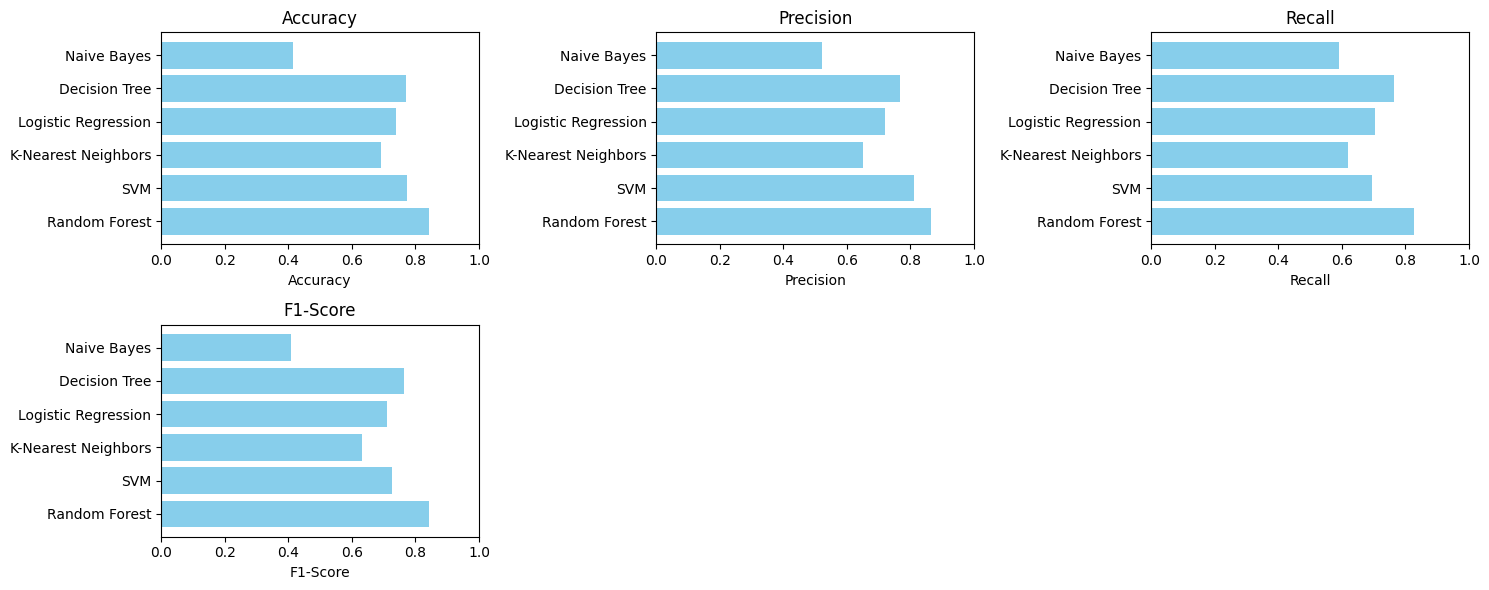

In [22]:
# Plotting each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(15 , 6))

for i , metrics in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metrics], color='skyblue')
    plt.title(metrics)
    plt.xlim(0, 1)
    plt.xlabel(metrics)

plt.tight_layout()
plt.show()